In [25]:
import matplotlib.pyplot as plt
import numpy as np
import math

from tensorlow.nodes import Graph, Placeholder, Variable
from tensorlow.session import Session
from tensorlow.operations import add, matmul, Sigmoid

In [3]:
g = Graph()
g.set_as_default()


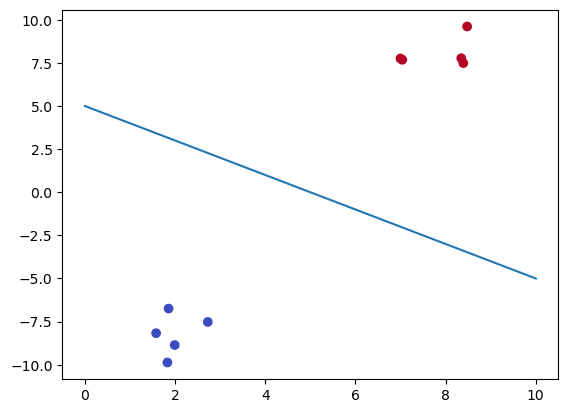

In [91]:
from sklearn.datasets import make_blobs

features, labels = make_blobs(n_samples=10, n_features=2, centers=2, random_state=75)
plt.scatter(features[:,0], features[:,1], c=labels, cmap='coolwarm')
x = np.linspace(0,10,10)
y = -x + 5
plt.plot(x,y)



[0.7856042  0.03619006 1.         0.05985436 0.16611418 0.98113303
 0.         0.04004787 0.79157647 0.987756  ]
[0.90471032 0.         1.         0.05188252 0.12063233 0.9056034
 0.08719742 0.16040672 0.90096307 0.8910748 ]


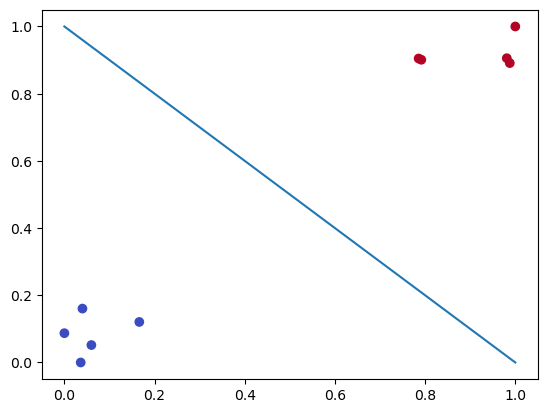

In [31]:
x0 = (features[:,0]-min(features[:,0]))/(max(features[:,0])- min(features[:,0]))
x1 = (features[:,1]-min(features[:,1]))/(max(features[:,1])- min(features[:,1]))
print(x0)
print(x1)
plt.scatter(x0, x1, c=labels, cmap='coolwarm')

x = np.linspace(0,1,10)
y = -x + 1
plt.plot(x,y)



In [32]:
list(zip(x0,x1))

[(0.7856041984060537, 0.9047103231563391),
 (0.036190059855128645, 0.0),
 (1.0, 1.0),
 (0.059854361898595804, 0.05188251602966648),
 (0.16611417554612964, 0.12063232960342232),
 (0.981133027785442, 0.9056033965239667),
 (0.0, 0.08719741608799102),
 (0.04004787011815104, 0.16040671626708042),
 (0.7915764671230938, 0.9009630693463305),
 (0.9877559954098296, 0.8910747990056048)]

In [92]:
# input layer

input_layer = Placeholder()

w = Variable([1,1])
b = Variable(-5)

h = add(matmul(w,input_layer), b)

output_layer = Sigmoid(h)
# output_layer = h


7.00, 7.75, label=1, 1.00, -0.00
1.83, -9.87, label=0, 0.00, 0.00
8.48, 9.61, label=1, 1.00, -0.00
1.99, -8.86, label=0, 0.00, 0.00
2.73, -7.52, label=0, 0.00, 0.00
8.35, 7.77, label=1, 1.00, -0.00
1.58, -8.17, label=0, 0.00, 0.00
1.86, -6.74, label=0, 0.00, 0.00
7.04, 7.68, label=1, 1.00, -0.00
8.39, 7.49, label=1, 1.00, -0.00


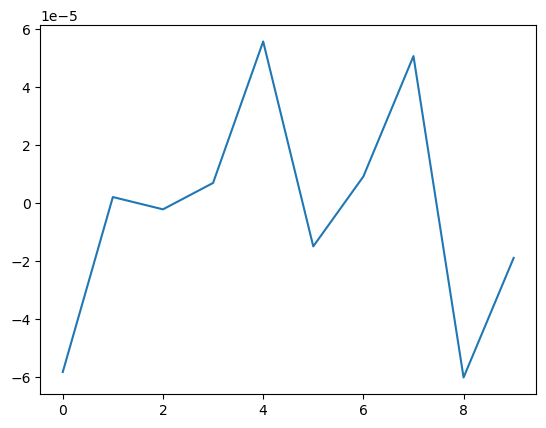

In [94]:

# X_test = list(zip(x0,x1))
X_test = features
Y_test = labels

sess = Session()
err_log = []
for i in range(len(X_test)):
    xi = X_test[i]
    
    feed_dict = {
        input_layer: xi
    }
    res = sess.run(operation=output_layer, feed_dict=feed_dict)
    err = res - Y_test[i]
    print(f"{xi[0]:.2f}, {xi[1]:.2f}, label={Y_test[i]}, {res:.2f}, {err:.2f}") 
    err_log.append(err)
    
    
    
plt.plot(err_log)


## No hay necesidad de hacer uniforme la entrada por que la funcion sigmoide necesita valores mayores que 1 para volver 1